# Breast Cancer Classification

This assignment will guide you through a introductory Machine Learning assignment where you will learn how to clean data and pre-process. Furthermore, you will also learn how to use this data to predict the accuracy using different algorithms/models, compute a correlation matix, splitting data for train and test data, and train the models using cross-validation. 

Breast Cancer is a form of cancer which occurs often. Breast Cancer Wisconsin is a dataset that originates from the UCI Machine Learning Repository and was donated on 15th July 1992. The dataset is focused on a classification problem, namely one needs to determine if the patient has a Malignant (cancerous cell) or Benign (non-cancerous cell). This dataset contains of 10 attributes and 683 instances. The last attribute is Class which consist of 2 values namely, 2 for Benign and 4 for Malignant.  

**Content**

1. Import Necessary Libraries
2. Read in and view data
3. Data visualization 
4. Cleaning data
5. Choosing best model

**The learning goals are:**

* Understand correlation between attributes
* Compute a correlation matrix
* Split data in train and test data
* Apply Support Vector Machine and Random Forest
* Make predictions based on validation set
* Compute confusion matrix. 

For each of the learning goals, you will need the programm in Python. 
It will clearly be pointed out with 

--- YOUR CODE BEGINS HERE 

--- YOUR CODE ENDS HERE

Typical steps for data science in Machine Learning are:

* Gathering data: a data set is is created or retrieved to use for prediction.
* Clean , prepare and manipulate data: to achieve homogeneity in the data sets, sometimes the data contains missing values which needs to be handled carefully. Data cleaning is the process of preparing data for analysis by weeding out information that is considered irrelevant.
* Train the model: A training model is a dataset that is used to train an ML algorithm. It consists of the sample output data and the corresponding sets of input data that have an influence on the output. The training model is used to run the input data through the algorithm to correlate the processed output against the sample output.
* Evaluate the model: Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.



# 1) Import necessary libraries

First off, we need to import several Python libraries such as numpy, sklearn, pandas, matplotlib and seaborn.

In [2]:
#NumPy is a Python library used for working with arrays. It also has functions for working in the domain of linear algebra, fourier transform, and matrices. 
#Pandas is a software library written for the Python programming language for data manipulation and analysis
#Matplotlib is a cross-platform, data visualization and graphical plotting library for Python 
#Seaborn is a library that uses Matplotlib underneath to plot graphs.
#sllearn is a library also known as sklearn to implement machine learning models and statistical modelling. Through scikit-learn, one can implement various machine learning models for regression, classification, clustering, and statistical tools for analyzing these models.


import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Read in and view data

It's time to read in our training and testing data using *pd.read_csv*, and take a first look at the training data. The datasets are CSV files. A CSV (comma-separated values) file is a text file that has a specific format which allows data to be saved in a table structured format.

In [3]:
df = pd.read_csv('../input/breast-cancer-wisconsin-benign-or-malignant/tumor.csv')
df.head()


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Missing data will be checked and preprocessed. 
We will also look at the data axes and attributes to give you an idea of the dataset.

In [4]:
df.replace('?',-99999, inplace=True)
print(df.axes)

print(df.columns)

[RangeIndex(start=0, stop=683, step=1), Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')]
Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')



We will look at the shape of the data using df.shape and at the number of instances and attributes. 

In [5]:
#visualize and explore the data
print(df.loc[20])

#print the shape of the dataset
print(df.shape)

Sample code number             1054590
Clump Thickness                      7
Uniformity of Cell Size              3
Uniformity of Cell Shape             2
Marginal Adhesion                   10
Single Epithelial Cell Size          5
Bare Nuclei                         10
Bland Chromatin                      5
Normal Nucleoli                      4
Mitoses                              4
Class                                4
Name: 20, dtype: int64
(683, 11)


**Explanation of dataset**

There are total 10 attributes which are all related to human cell information (integers):
* **Sample code number:** id number
* **Clump Thickness:** 1 - 10
* **Uniformity of Cell Size:** 1 - 10
* **Uniformity of Cell Shape:** 1 - 10
* **Marginal Adhesion:** 1 - 10
* **Single Epithelial Cell Size:** 1 - 10
* **Bare Nuclei:** 1 - 10
* **Bland Chromatin:** 1 - 10
* **Normal Nucleoli:** 1 - 10
* **Mitoses: 1** - 10
* **Predicted class:** 2 for benign and 4 for malignant

Describing the data will give us an idea of the central tenency, dispersion and shape of the dataset's distribution.


In [6]:
#describing the data
print(df.describe())

       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.830000e+02       683.000000               683.000000   
mean         1.076720e+06         4.442167                 3.150805   
std          6.206440e+05         2.820761                 3.065145   
min          6.337500e+04         1.000000                 1.000000   
25%          8.776170e+05         2.000000                 1.000000   
50%          1.171795e+06         4.000000                 1.000000   
75%          1.238705e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                683.000000         683.000000   
mean                   3.215227           2.830161   
std                    2.988581           2.864562   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000     

# 3) Visualize data

It's time to visualize our data so we can understand our data better!

We will perform a graphical representation of our dataset where histograms will be used visualizing each attribute. 
Histograms are representing the distribution of data where the function matplotlib.pyplot.hist() that calls, on each series in the Data Frame, resulting in one histogram per column.

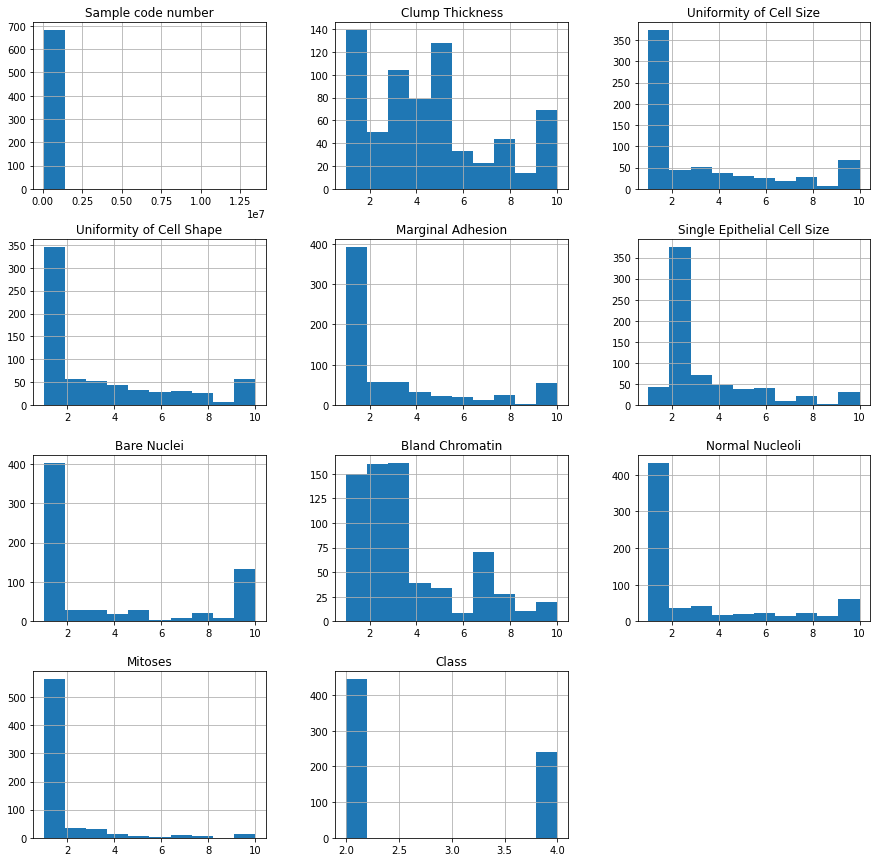

In [7]:
#plotting the data
df.hist(figsize=(15,15))
plt.show()

To understand the correlation between attributes, a scatter matrix will be computed. 
This can be used for a collection of variables where each variable is plotted against each other. 

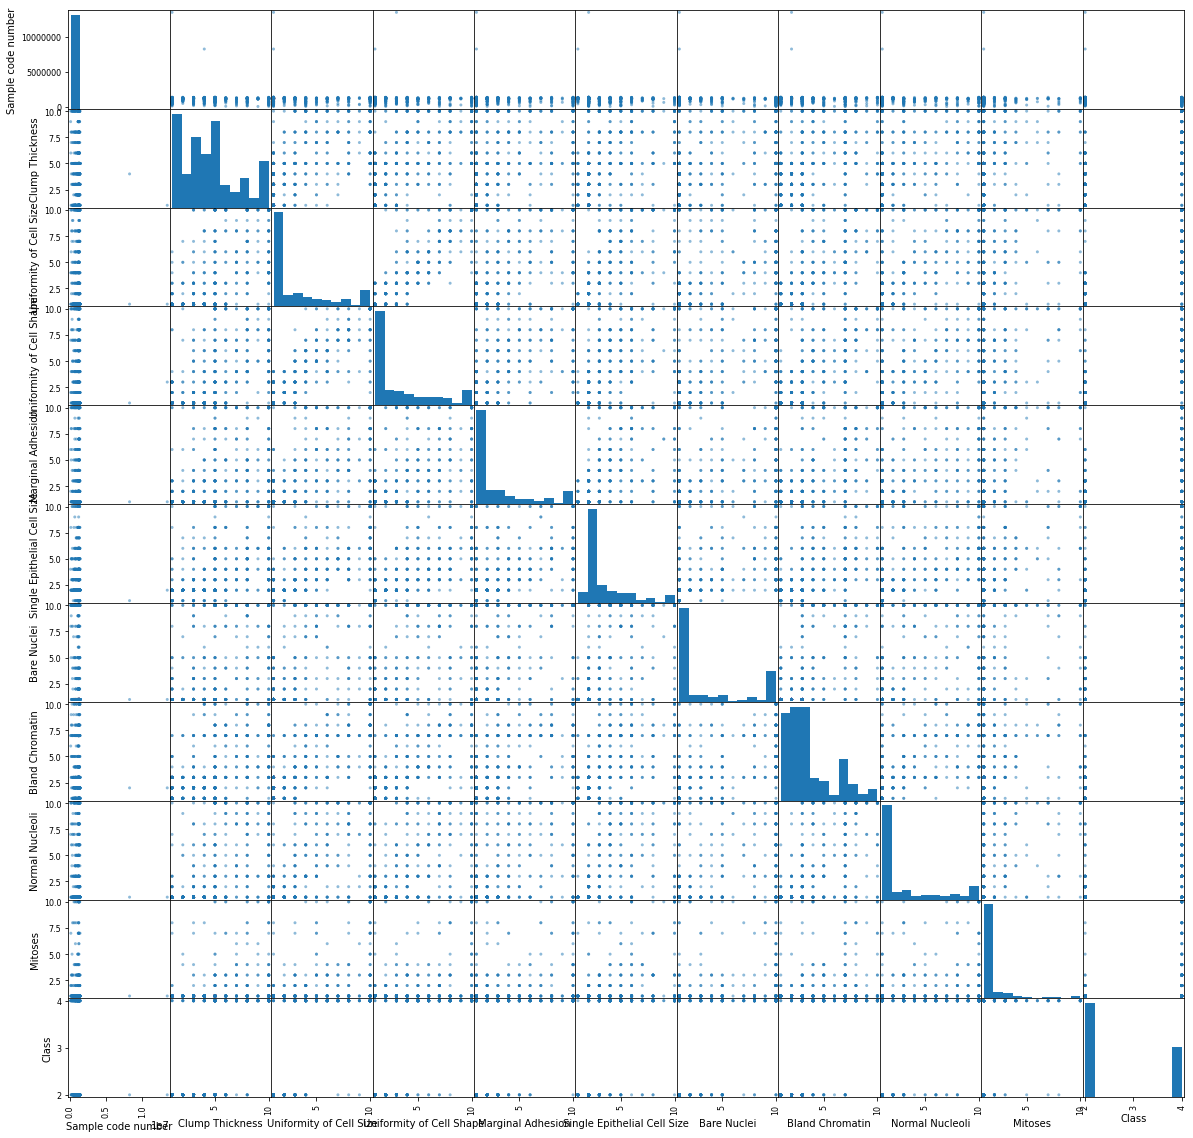

In [8]:
#produce scatter_matrix of dataset using figsize=(20,20)

### YOUR CODE BEGINS HERE

scatter_matrix(df, figsize=(20,20))
plt.show()

### YOUR CODE ENDS HERE

In the following step, we will compute a correlation matrix to observe the correlation between attributes. It helps to understand which attributes are having a high correlation and are important for us to focus on! The correlation values lie between -1 and 1 in Python. 

In correlation value, there are two important components. The first component is the magnitude, meaning the larger the magnitidue (closer to -1 or 1), the stronger the correlation is. The second component is the sign meaning, if this is negative there exists a inverse correlation. If the sign value if positive, there is a regular correlation.


<AxesSubplot:>

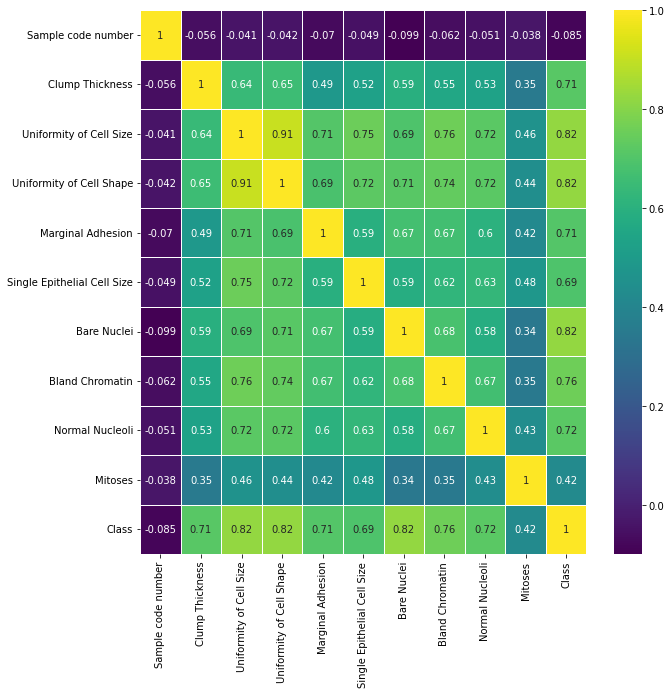

In [9]:
#compute a correlation matrix using seaborn library with figsize(10,10)



corrmat=df.corr()

### YOUR CODE BEGINS HERE

plt.figure(figsize=(10,10))
sns.heatmap(corrmat,cmap='viridis',annot=True,linewidths=0.5,)

### YOUR CODE ENDS HERE

One can observe that the column "ID" does not has a correlation with the main target which is "Class". Furthermore, one can notice a high correlation between "Uniformity of cell shape" and "Uniformity of cell size" which is 0.91. 



# 4) Cleaning the data 

Time to clean our data to account for unnecessary information!

In the following step, the columns will be converted to a list and will be divided into 2 variables namely, X and y. 
* X consists of all attributes except class and ID. 
* in y, the target value is the "Class" attribute and there will be observed for the shape of both variables. 





In [10]:
#get all the columns from the dataframe
columns=df.columns.tolist()

#filter the columns to remove data we do not want
columns= [c for c in columns if c not in ["Class", "ID"]]

#store the variable we will be predicting on
target="Class"

X =df[columns]
y= df[target]

#print shapes
print(X.shape)
print(y.shape)

(683, 10)
(683,)


In [11]:
#creating x and y datasets for training
#from sklearn.model_selection import train_test_split and use test_size=0.2

### YOUR CODE BEGINS HERE

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

### YOUR CODE ENDS HERE

In [12]:
#specify the testing option
seed=5
scoring='accuracy'

print(X_train.shape, X_test.shape)
print(y_train, y_test.shape)

(546, 10) (137, 10)
385    2
13     2
499    4
621    2
647    2
      ..
663    2
148    4
332    2
46     2
473    4
Name: Class, Length: 546, dtype: int64 (137,)


In [13]:
#import warnings filter
from warnings import simplefilter
#ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Choosing best model

We will be testing the following models with my training data:

* Support Vector Machines
* Random Forest Classifier

The following step is considered the most important step. 
Both algorithms (SVM and Random Forest) and then we will train model and test it using 10-fold cross-validation.

In [14]:
from sklearn.ensemble import RandomForestClassifier

#Define models to train, create empty list for models and append SVM. Append RFC with depth of 5 and n of 40.

### YOUR CODE BEGINS HERE

models = []
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier(max_depth=5, n_estimators=40)))

#evaluate each model in turn, create empty lists with the names results and names.
results = []
names = []

### YOUR CODE ENDS HERE


for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)

[0.65454545 0.70909091 0.61818182 0.72727273 0.63636364 0.63636364
 0.74074074 0.68518519 0.7037037  0.62962963]
SVM: 0.674108 (0.042222)
[0.94545455 0.98181818 0.94545455 1.         0.96363636 0.96363636
 0.96296296 0.96296296 1.         0.98148148]
RFC: 0.970741 (0.018577)


One can observe that an empty list is created named *models* and the classifiers Support Vector Machine and Random Forest are appended.
In Random Forest, n_estimators is set at 40 which means that 40 trees will be build.

Also, KFold cross-validation is used. This means that the data set in split into L number of folds/sections where each fold is being used as a testing set at some point. 
Let’s take the scenario of 10-Fold cross-validation(K=10) like in the code. Here, the data set is split into 10 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 10 folds has been used as the testing set.

In cross_val_score, the scoring is the accuracy score. Finally, the accuracy of all 10 folds score  is computed and  the mean and standard deviation are calculated.

Below, a plot is computed to compare the accuracy of both algorithms. One can observe that Random Forest performs much better dan Support Vector Machine. 


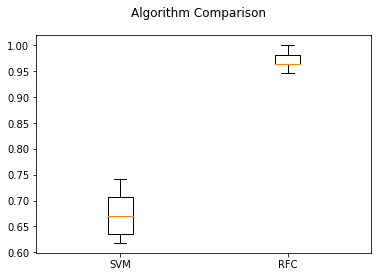

In [15]:
#compare Algorithms
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

One can observe the results of all 10 folds which are graphically visualized with a mean value of all scores in the following step. 

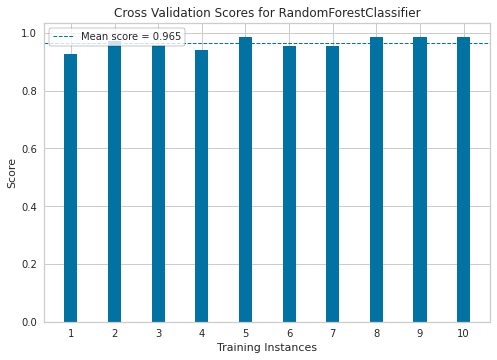

<AxesSubplot:title={'center':'Cross Validation Scores for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [16]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

_, ax = plt.subplots()

cv = StratifiedKFold(10)

oz = CVScores(RandomForestClassifier(max_depth=5, n_estimators = 40), ax=ax, cv=cv, scorings='accuracy')
oz.fit(X,y)
oz.poof()

In the following step, pedictions will be made on the validation sheet. There will be a close look on the accuracy score and the classification report.



In [17]:
#make predictions on validation dataset
#create a for-loop and use model.predict on X_test
#print the name, accuracy_score and classification_report

### YOUR CODE BEGINS HERE

for name, model in models: 
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test,predictions))
    
### YOUR CODE ENDS HERE

SVM
0.583941605839416
              precision    recall  f1-score   support

           2       0.58      1.00      0.73        78
           4       1.00      0.03      0.07        59

    accuracy                           0.58       137
   macro avg       0.79      0.52      0.40       137
weighted avg       0.76      0.58      0.45       137

RFC
0.9708029197080292
              precision    recall  f1-score   support

           2       0.96      0.99      0.97        78
           4       0.98      0.95      0.97        59

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



Concerning the classification report, one can observe the values of precision, recall, F1-score for each class. These computed averages includes:

* macro average (averaging the unweighted mean per label)
* weighted average (averaging the support-weighted mean per label)
* sample average (only for multilabel classification)
* micro average (averaging the total true positives, false negatives and false positives) which is only shown for multi-label or multi-class with a subset of classes because it is accuracy otherwise.

In the following step, a confusion matrix is computed evaluating the accuracy of the classification. 

The following properties precision, recall, accuracy,  and error rate of the confusion matrix will be explained for you to understand the confusion matrix. 


* Precision refers to the accuracy of positive predictions of which the formula is TP/TP+FP

* Recall is about the sensitivity, meaning the false negatives ratio of correctly predicted positive observations to all observations in actual class. The formula is TP/Actual yes.

* Accuracy is about the ratio of correctly predicted observation to the total observations. The formula of Accuracy is TP+TN/Total.

* F1 Score is the weighted average of Recall and Precision. Therefore, this score takes both false positives and false.

* Error Rate is calculated by 1- Accuracy Score.

=== Confusion Matrix ===
[[77  1]
 [ 3 56]]




Text(0.5, 28.5, 'Predicted label')

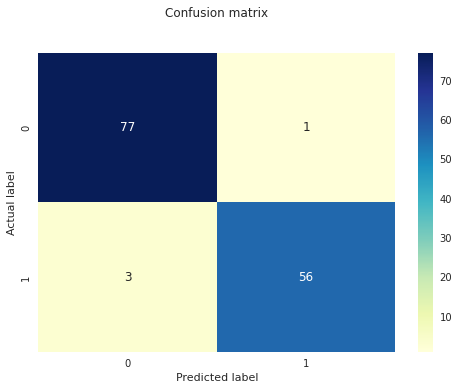

In [20]:
from sklearn.metrics import confusion_matrix
predict = model.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predict))
print('\n')

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predict)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

As one can observe, for the 137 instances in the testing data FP = 3 and FN = 1. These are truely wrong predicted. 4 out of 137 instances are wrong predicted which is important since it concerns Cancer and can be lethal for patients.  